In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from functions import int_to_dt
from functions import build_feature_matrix
from functions import build_target_array


# Data Organisation
Here, we create a feature matrix which is used to train and test the different models. The matrix is built with the following attributes.

* "Date"
* "PRCP"
* "SNWD"
* "TMAX"
* "TMIN"

Note that the date has been converted into a intiger (e.g 1995-05-01 = 19950501). This is the format which is required for the sklearn models.

We are also creating the target array. This is the quality we are trying to predict from the data given in the feature matrix. This array has one attribute, mililmeters of snowfall per day.

In [7]:
x = build_feature_matrix('data/glacier_national_park_1965-2000.csv')
y = build_target_array('data/glacier_national_park_1965-2000.csv')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # Spliting the data in training & test groups.

# Training & Predictions

## DecisionTreeRegressor (dtr)
This model makes works through a single decision tree, making a series of sequential decisions in order to make its final prediction.

<br>

## RandomForrestRegressor (rfr) 
This model builds multiple decision trees from a varity of variables in the feature matrix then pools these decsions to make its final prediction. This is the most complex model.

<br>

## LinearRegression (lr) 
This model is designed to predicted linear data and therefore is likely to be the least accurate. Weather data is not linear, it is more appropriate to think of it as a sin-wave. This model has been included to illustrate this point. 


In [9]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)

rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

dtr_pred = dtr_model.predict(x_test)
rfr_pred = rfr_model.predict(x_test)
lr_pred = lr_model.predict(x_test)

# Results
## neg_mean_squared_error
Provides the average negative squared difference between the predicted values and the observed values. This tells us on average, how many milimeters of snowfall the predictions were incorrect by.

<br>

## R2 score 
R-squared explains to what extent the variance in the feature matrix explains the variance in the target array. For example, if the R2 of a model is 0.50, then approximately half of the variation in the feature matrix can be preditcted by the model.

In [10]:
scores = cross_val_score(dtr_model, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
print("dtr_model cross_val mean:", scores.mean())
print("dtr_model cross_val standard deviation:", scores.std())
print()

scores = cross_val_score(rfr_model, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
print("rfr_model cross_val mean:", scores.mean())
print("rfr_model cross_val standard deviation:", scores.std())
print()

scores = cross_val_score(lr_model, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
print("lr_model cross_val mean:", scores.mean())
print("lr_model cross_val standard deviation:", scores.std())
print()

print('dtr_model r2 score:', r2_score(y_test, dtr_pred))
print()
print('rfr_model r2 score:', r2_score(y_test, rfr_pred))
print()
print('lr_model r2 score:', r2_score(y_test, lr_pred))

dtr_model cross_val mean: 14.863338720118197
dtr_model cross_val standard deviation: 2.156235541912965

rfr_model cross_val mean: 11.79265789571634
rfr_model cross_val standard deviation: 2.0837354719144403

lr_model cross_val mean: 34.32421714056618
lr_model cross_val standard deviation: 2.9071714883330433

dtr_model r2 score: 0.9273618224411102

rfr_model r2 score: 0.9506836009159698

lr_model r2 score: 0.6126586837220794


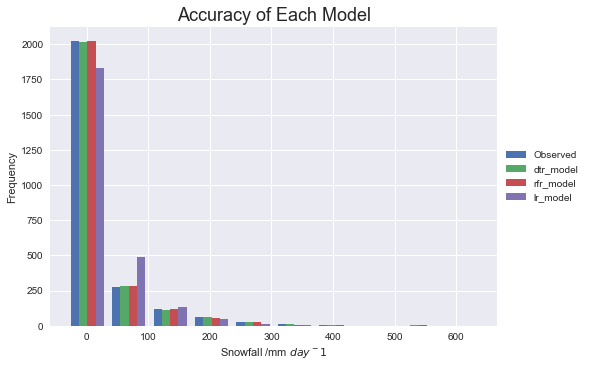

In [11]:
plt.hist([y_test.reshape(-1), dtr_pred, rfr_pred.reshape(-1), lr_pred.reshape(-1)], label=['Observed', 'dtr_model', 'rfr_model', 'lr_model'])

plt.title('Accuracy of Each Model', fontsize=18)
plt.xlabel('Snowfall /mm $day^-1$')
plt.ylabel('Frequency')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Introducing Fresh Data

Here we will ask the trained RandomForretRegressor model to predict the snowfall in Yoho National Park. The park is apoximatly 90 km east of Glacier National Park as sits at 466 meters higher. 

As seen above, the rfr model demonstrated the greatest level of accuracy and we will therefore be using it for the following predictions.

<br>

## Data Organisation

Here we are creating the feature matrix with the same attributes that the model has been trained with.

* "Date"
* "PRCP"
* "SNWD"
* "TMAX"
* "TMIN"

We are also creating the target array in order to compare the observed and predicted values. This array has one attribute, mililmeters of snowfall per day.


In [12]:
x_yoho = build_feature_matrix('data/yoho_national_park_1974-1993.csv')
y_yoho = build_target_array('data/yoho_national_park_1974-1993.csv')

# Prediction

In [13]:
yoho_pred = rfr_model.predict(x_yoho)

# Results (Yoho National Park)

In [14]:
print('rf_model r2 score:', r2_score(y_yoho, yoho_pred))

rf_model r2 score: 0.9333742356514763


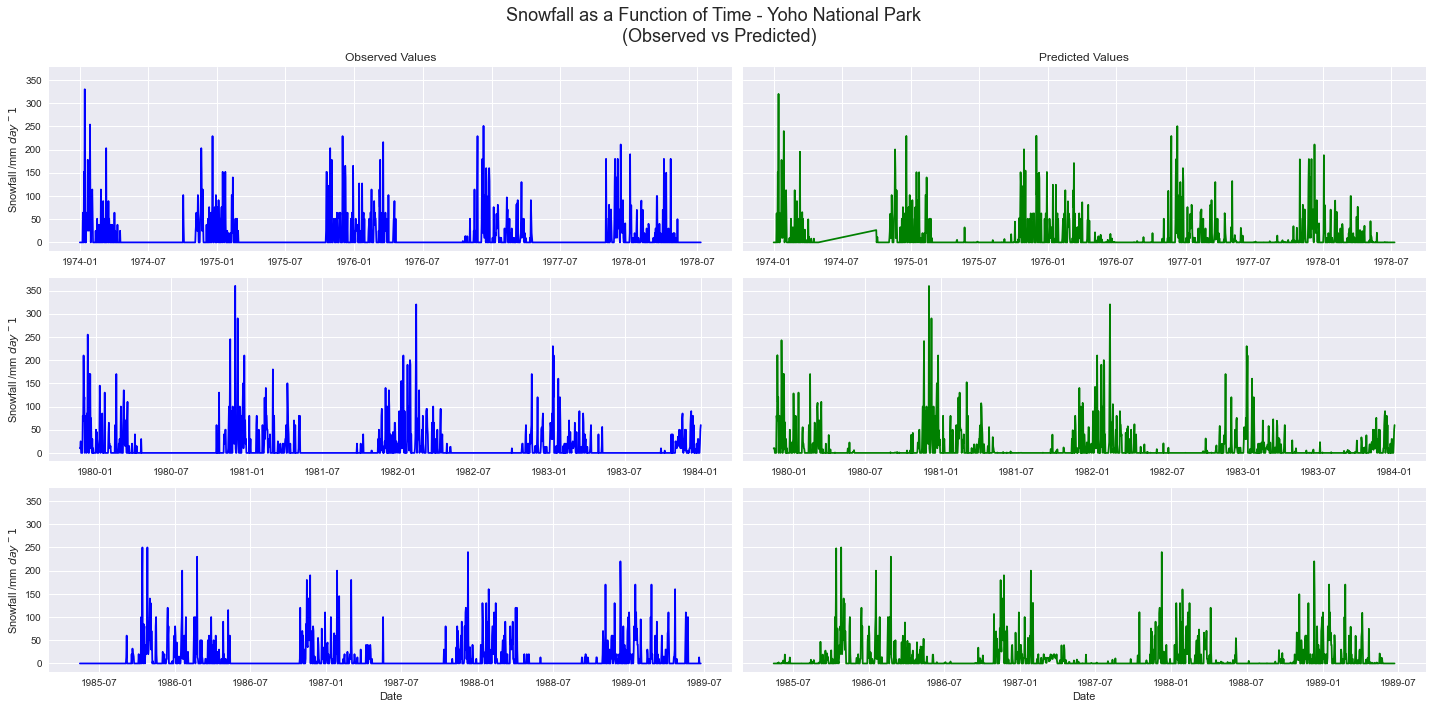

In [15]:
plt_x_yoho = int_to_dt(x_yoho[:, 0].astype(np.int))

fig, ax = plt.subplots(3, 2, sharey=True)

ax[0, 0].plot(plt_x_yoho[:1500], y_yoho[:1500], color='blue')
ax[0, 1].plot(plt_x_yoho[:1500], yoho_pred[:1500], color='green')

ax[1, 0].plot(plt_x_yoho[2000:3500], y_yoho[2000:3500], color='blue')
ax[1, 1].plot(plt_x_yoho[2000:3500], yoho_pred[2000:3500], color='green')

ax[2, 0].plot(plt_x_yoho[4000:5500], y_yoho[4000:5500], color='blue')
ax[2, 1].plot(plt_x_yoho[4000:5500], yoho_pred[4000:5500], color='green')

fig.suptitle('Snowfall as a Function of Time - Yoho National Park \n (Observed vs Predicted)', fontsize=18)

ax[0, 0].set(ylabel='Snowfall /mm $day^-1$', title='Observed Values')
ax[0, 1].set(title='Predicted Values')
ax[1, 0].set(ylabel='Snowfall /mm $day^-1$')
ax[2, 0].set(ylabel='Snowfall /mm $day^-1$')

ax[2, 0].set(xlabel='Date')
ax[2, 1].set(xlabel='Date')

fig.set_size_inches(20, 10)
fig.tight_layout()

fig.show()